In [3]:
suppressPackageStartupMessages(library(export))
suppressPackageStartupMessages(library(edgeR))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
theme_set(theme_bw())

In [104]:
y_keep <- readRDS('y_keep.rds')
theme_legend_free = function(){
	theme(axis.title.y = element_text(size = 17, 
	margin = margin(t=0, r=5, b=0, l=10)),
	axis.text.y = element_text(size = 17, face = 'bold'),
	axis.text.x = element_text(size = 17, face= 'bold'),
	axis.ticks.x = element_blank(),
	legend.position = "none",
    plot.title = element_text(size = 24, face = 'bold'),
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank(),
	panel.grid.major = element_blank(),
	panel.grid.minor = element_blank())
}

In [21]:
design <- model.matrix(~ 0 + y_keep$samples$Diet)
colnames(design) <- levels(y_keep$samples$Diet)

In [22]:
y.keep.disp <- estimateDisp(y_keep, design, robust=TRUE)

In [23]:
fit <- glmQLFit(y.keep.disp, design, robust=TRUE)
con <- makeContrasts(TXN - HFD, levels=design)
qlf <- glmQLFTest(fit, contrast=con)
stat_txnHFD_qlf <- topTags(qlf, n=nrow(y.keep.disp))$table

In [24]:
head(stat_txnHFD_qlf)
write.csv(stat_txnHFD_qlf, "stat_txnHFD_qlf_LV.csv")

,gene.id,entrez,symbol,gene.name,logFC,logCPM,F,PValue,FDR
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000029656,ENSMUSG00000029656,110382,C8b,"complement component 8, beta polypeptide",1.6600253,6.900590,48.89864,1.879256e-08,0.0001841671
ENSMUSG00000072849,ENSMUSG00000072849,20704,Serpina1e,"serine (or cysteine) peptidase inhibitor, clade A, member 1E",3.3069803,10.129337,46.29178,6.346453e-08,0.0002732497
ENSMUSG00000057666,ENSMUSG00000057666,14433,Gapdh,glyceraldehyde-3-phosphate dehydrogenase,-0.9359870,7.670943,40.01619,8.364786e-08,0.0002732497
ENSMUSG00000023031,ENSMUSG00000023031,109901,Cela1,"chymotrypsin-like elastase family, member 1",1.4353367,4.708813,38.84634,1.280557e-07,0.0003137365
ENSMUSG00000058207,ENSMUSG00000058207,20714,Serpina3k,"serine (or cysteine) peptidase inhibitor, clade A, member 3K",0.9829777,11.927390,37.21845,1.841496e-07,0.0003609332
ENSMUSG00000020122,ENSMUSG00000020122,13649,Egfr,epidermal growth factor receptor,1.4931658,6.653518,38.47736,2.425834e-07,0.0003962196


In [1]:
kegg <- read.csv('KEGGterms.csv', header=T)
head(kegg)

,pathwayTerms,Direction,P.value,Adjusted.P.value,Odds.Ratio,Combined.Score,enrichedGenes
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Biosynthesis of unsaturated fatty acids,Down Regulation,6.50e-08,1.97e-05,11.138614,184.33556,9
2,Glutathione metabolism,Down Regulation,5.30e-07,8.02e-05,6.806931,98.36667,11
3,Fluid shear stress and atherosclerosis,Down Regulation,6.91e-07,6.98e-05,4.431212,62.85821,16
4,Amino sugar and nucleotide sugar metabolism,Down Regulation,3.25e-06,2.46e-04,7.274197,91.92319,9
5,Chemical carcinogenesis,Down Regulation,4.30e-06,2.61e-04,5.055825,62.47167,12
6,Drug metabolism,Down Regulation,6.17e-06,3.12e-04,4.516241,54.17470,13


In [4]:
orderedk <- kegg %>%
select(Direction, Combined.Score, pathwayTerms, enrichedGenes) %>%
arrange(desc(Combined.Score))

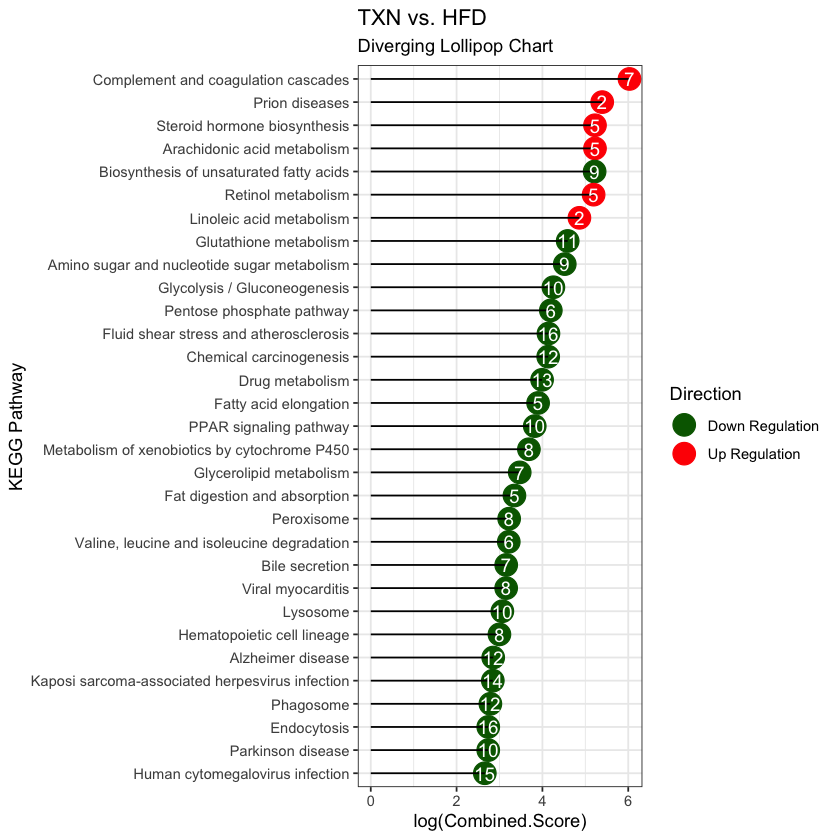

In [6]:
ggplot(orderedk, aes(x=reorder(`pathwayTerms`, Combined.Score), y=log(Combined.Score), label=enrichedGenes)) + 
  geom_point(aes(color=Direction), stat='identity', size=6)  +
  scale_color_manual(values = c('darkgreen','red')) +
  geom_segment(aes(y = 0, 
                   x = `pathwayTerms`, 
                   yend = log(Combined.Score),
                   xend = `pathwayTerms`)) +
  geom_text(color="white", size=4) +
  labs(title="TXN vs. HFD", 
       subtitle="Diverging Lollipop Chart",
       x = 'KEGG Pathway') + 
  coord_flip()

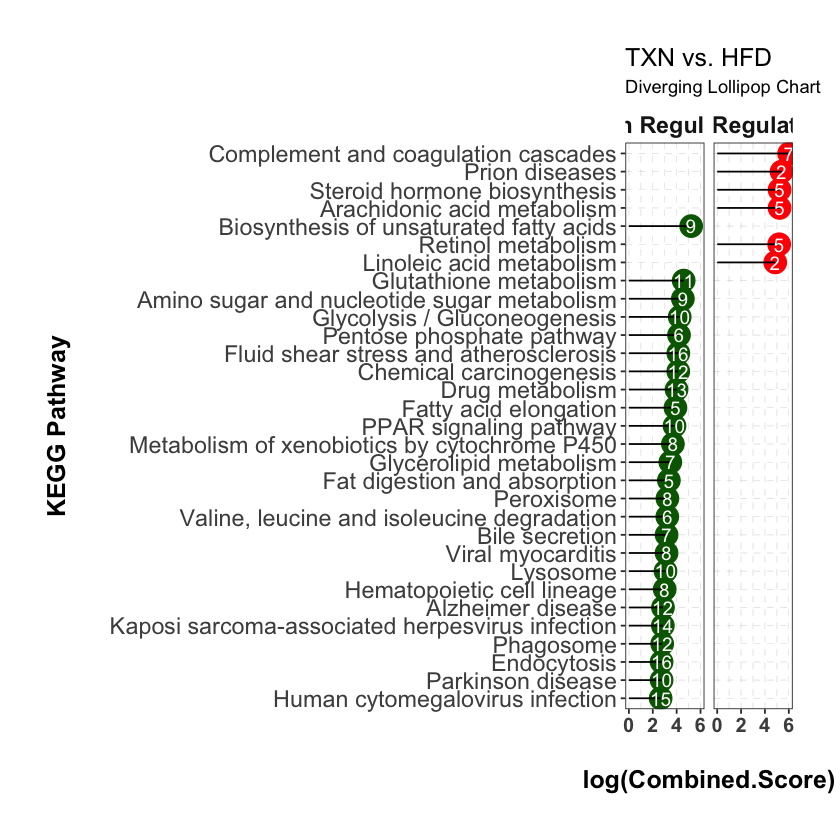

In [7]:
ggplot(orderedk, aes(x=reorder(`pathwayTerms`, Combined.Score), y=log(Combined.Score), label=enrichedGenes)) + 
  geom_point(aes(color=Direction), stat='identity', size=6)  +
  scale_color_manual(values = c('darkgreen','red')) +
  geom_segment(aes(y = 0, 
                   x = `pathwayTerms`, 
                   yend = log(Combined.Score),
                   xend = `pathwayTerms`)) +
  geom_text(color="white", size=4) +
  labs(title="TXN vs. HFD", 
       subtitle="Diverging Lollipop Chart",
       x = 'KEGG Pathway') + 
  coord_flip()+
  facet_wrap(~Direction, ncol=2) +
  theme(axis.text.x = element_text(size = 12, face='bold'),
           axis.text.y = element_text(size = 14),
           axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
           axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0)),
        axis.title = element_text(size = 15, face = "bold"),
        plot.title = element_text(size = 15),
        strip.background = element_blank(),
        strip.text = element_text(size = 14, face = 'bold'),
        plot.margin = margin(1, 1, 1, 1, "cm"),
        panel.grid.major = element_line(color='grey', linetype='dashed', size=0.1),
        panel.grid.minor = element_line(color='grey', linetype='dashed', size=0.1),
        legend.position = "none")

In [216]:
plot <- ggplot(orderedk, aes(x=reorder(`pathwayTerms`, Combined.Score), y=Combined.Score, label=enrichedGenes)) + 
  geom_point(aes(color=Direction), stat='identity', size=6)  +
  scale_color_manual(values = c('darkgreen','red')) +
  geom_segment(aes(y = 0, 
                   x = `pathwayTerms`, 
                   yend = Combined.Score, 
                   xend = `pathwayTerms`)) +
  geom_text(color="white", size=4) +
  labs(#title="", 
       #subtitle="TXN vs. HFD",
       x = 'Enriched KEGG Pathway', y = 'combined score') + 
  coord_flip()+
  facet_wrap(~Direction, ncol=2) +
  theme(#axis.text.x = element_text(size = 10, face='bold'),
           #axis.text.y = element_text(size = 14),
           axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
           axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0), size=12),
        axis.title = element_text(size = 12, face = "bold"),
        plot.title = element_text(size = 14, face = "bold"),
        strip.background = element_blank(),
        strip.text = element_text(size = 14),
        plot.margin = margin(0, 0.5, 0.5, 0.5, "cm"),
        panel.grid.major = element_line(color='grey', linetype='dashed', size=0.1),
        panel.grid.minor = element_line(color='grey', linetype='dashed', size=0.1),
        legend.position = "none")

In [162]:
graph2pdf(plot, file = "txnHFD.pdf", width = 14, height = 8)

Exported graph as txnHFD.pdf



In [163]:
bp <- read.csv('BPTerms.csv', header=T)
ordered <- bp %>%
select(Direction, Combined.Score, bpTerms, enrichedGenes) %>%
arrange(desc(Combined.Score))

In [220]:
bpplot <- ggplot(ordered, aes(x=reorder(`bpTerms`, Combined.Score), y=Combined.Score, label=enrichedGenes)) + 
  geom_point(stat='identity', color="darkgreen", size=6)  +
  geom_segment(aes(y = 0, 
                   x = `bpTerms`, 
                   yend = Combined.Score, 
                   xend = `bpTerms`)) +
  geom_text(color="white", size=4) +
  labs(#title="", 
       #subtitle="TXN vs. HFD",
       x = 'Enriched Biological Process', y = '') + 
  coord_flip()+
  facet_wrap(~Direction, ncol=2) +
  theme(axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
        axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 0, l = 0), size=12),
        axis.title = element_text(size = 12, face = "bold"),
        plot.title = element_text(size = 14, face = "bold"),
        strip.background = element_blank(),
        strip.text = element_text(size = 14),
        plot.margin = margin(0, 0.5, 0, 0.5, "cm"),
        panel.grid.major = element_line(color='grey', linetype='dashed', size=0.1),
        panel.grid.minor = element_line(color='grey', linetype='dashed', size=0.1),
        legend.position = "none")

In [167]:
graph2pdf(bpplot, file = "txnHFD-bp.pdf", width = 10, height = 10)

Exported graph as txnHFD-bp.pdf



In [221]:
GO <- (bpplot + plot_spacer())/plot

In [222]:
graph2pdf(GO, file = "txnHFDGO.pdf", width = 14, height = 12)

Exported graph as txnHFDGO.pdf



In [ ]:
con2 <- makeContrasts(HXN - HFD, levels=design)
con3 <- makeContrasts(LFD - HFD, levels=design)
qlf2 <- glmQLFTest(fit, contrast=con2)
stat_hxnHFD_qlf <- topTags(qlf2, n=nrow(y.keep.disp))$table
qlf3 <- glmQLFTest(fit, contrast=con3)
stat_lfdHFD_qlf <- topTags(qlf3, n=nrow(y.keep.disp))$table

In [86]:
logCPM <- cpm(y.keep.disp, prior.count=2, log=TRUE)
#rownames(logCPM) <- y.keep.disp$genes$symbol
colnames(logCPM) <- rownames(y.keep.disp$samples)

In [101]:
o <- order(qlf$table$PValue)
length(o)

[1] 1564

In [88]:
set <- logCPM[o[1:60],]
set <- t(scale(t(set)))

In [91]:
col.pan <- colorpanel(100, "green", "white", "red")
col.grp <- c("grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", 
    "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", "#0080ff", 
    "red",  "red", "red", "red", "red", "red", "red", "red", "red", "red", 
    "darkgreen",  "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen", "darkgreen")
cond.col <- c("LFD" = "grey", "HFD" = "#0080ff", "HXN" = "red", "TXN" = "darkgreen")

In [99]:
pdf("heatmap_top100_txn_hfd.pdf")
cim(set, color=col.pan, col.names=TRUE, 
    cluster = "row", symkey=FALSE, keysize=c(1.1,0.8),
    row.cex=0.4, col.sideColors=col.grp,
    legend=list( legend = unique(y.keep.disp$samples$group), col = cond.col, title = "Diet", cex = 0.7),
    #title="Top 60 \nDifferential Expressed Genes in the Liver"
   )
dev.off()

pdf 
  2

In [104]:
all <- logCPM[o[1:200],]
all <- t(scale(t(all)))

In [106]:
pdf("heatmap_all_txn_hfd.pdf")
cim(all, color=col.pan, col.names=TRUE, 
    cluster = "row", symkey=FALSE, keysize=c(1.1,0.8),
    row.cex=0.3, col.sideColors=col.grp,
    legend=list( legend = unique(y.keep.disp$samples$group), col = cond.col, title = "Diet", cex = 0.7),
    #title="Top 60 \nDifferential Expressed Genes in the Liver"
   )
dev.off()

pdf 
  2

In [47]:
pdf("volplot-txn-hfd.pdf")
volcanoData <- cbind(stat_txnHFD_qlf$logFC, -log10(stat_txnHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_txnHFD_qlf$FDR < 0.4
table(DEGs)
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_txnHFD_qlf$FDR<0.4)
plot(volcanoData, pch=16, col = point.col, cex = 0.7, main=paste("TXN vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=1.5, cex.axis=1.2)
text(x=stat_txnHFD_qlf$logFC[sign.genes] , y=-log10(stat_txnHFD_qlf$FDR[sign.genes]), 
    label=NULL)
dev.off()

DEGs
FALSE  TRUE 
 1269   295 

pdf 
  2

In [46]:
pdf("volplot-hxn-hfd.pdf")
volcanoData <- cbind(stat_hxnHFD_qlf$logFC, -log10(stat_hxnHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_hxnHFD_qlf$FDR < 0.4
table(DEGs)
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_hxnHFD_qlf$FDR<0.4)

plot(volcanoData, pch=16, col = point.col, cex = 0.7, 
     main=paste("HXN vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=1.5, cex.axis=1.2)

text(x=stat_hxnHFD_qlf$logFC[sign.genes] , y=-log10(stat_hxnHFD_qlf$FDR[sign.genes]), 
    label=NULL)
dev.off()

DEGs
FALSE  TRUE 
 1558     6 

pdf 
  2

In [48]:
pdf("volplot-lfd-hfd.pdf")
volcanoData <- cbind(stat_lfdHFD_qlf$logFC, -log10(stat_lfdHFD_qlf$FDR))
colnames(volcanoData) <- c("logFC", "-Log10FDR")
DEGs <- stat_lfdHFD_qlf$FDR < 0.4
table(DEGs)
point.col <- ifelse(DEGs, "red", "black")
sign.genes=which(stat_lfdHFD_qlf$FDR<0.4)
plot(volcanoData, pch=16, col = point.col, cex = 0.7, main=paste("LFD vs. HFD", "\nNumber of DEGs: ", table(DEGs)[2]),
    cex.main=2, cex.lab=1.5, cex.axis=1.2)
text(x=stat_lfdHFD_qlf$logFC[sign.genes] , y=-log10(stat_lfdHFD_qlf$FDR[sign.genes]), 
    label=NULL)
dev.off()

DEGs
FALSE  TRUE 
 1352   212 

pdf 
  2

In [38]:
table(DEGs)[2]

TRUE 
   6